In [217]:
import os
import sys
import glob
import scipy
import skbio
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['pdf.fonttype'] = 42

from IPython.display import display, HTML
import tRep

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

### Load metadata

In [222]:
Mdb = pd.read_csv('/data/viral_genome_analysis/tables/metadata/sample_metadata_v2_sample_name_adjusted.csv')
Mdb

,sample,core,location,method,date,mean_ct,ct_from_replicate,sequencing,sample_complete_description
0,5_13_A_S1,MIGS,Oakland,amicon,05/13/20,30.70,1,enriched,5_13_A_S1_MIGS
1,5_13_C_S2,MIGS,Oakland,amicon,05/13/20,30.70,0,enriched,5_13_C_S2_MIGS
2,5_19_F_S3,MIGS,Oakland,amicon,05/19/20,29.50,0,enriched,5_19_F_S3_MIGS
3,5_19_A_S4,MIGS,Oakland,amicon,05/19/20,29.50,1,enriched,5_19_A_S4_MIGS
4,5_28_I_S25,MIGS,Oakland,amicon,05/28/20,31.37,0,enriched,5_28_I_S25_MIGS
5,5_28_E_S26,MIGS,Berkeley,amicon,05/28/20,33.80,0,enriched,5_28_E_S26_MIGS
6,5_28_A_S28,MIGS,BerkeleyHills,amicon,05/28/20,35.47,0,enriched,5_28_A_S28_MIGS
7,6_02_Nc_S27,MIGS,Berkeley,amicon,06/02/20,33.37,0,enriched,6_02_Nc_S27_MIGS
8,6_02_Sc_S29,MIGS,Oakland,amicon,06/02/20,30.37,0,enriched,6_02_Sc_S29_MIGS
9,6_02_Ac_S31,MIGS,BerkeleyHills,amicon,06/02/20,36.23,0,enriched,6_02_Ac_S31_MIGS


In [223]:
sample2core = dict(zip(Mdb['sample'],Mdb['core']))
sample2description = dict(zip(Mdb['sample'],Mdb['sample_complete_description']))
sample2enrichment = dict(zip(Mdb['sample'],Mdb['sequencing']))
sample2method = dict(zip(Mdb['sample'],Mdb['method']))

In [227]:
import glob, os
import pandas as pd

log_files = glob.glob('/data/viral_genome_analysis/tables/bt2_mapping2human/*log')

table = defaultdict(list)
for log in log_files:
    log_name = log.split('/')[-1]
    sample_name = log_name.split('-vs-')[1].split('_mapped')[0]
    
    with open(log, "r") as file:
        first_line = file.readline()
        total_read_pairs = first_line.strip().split(" ")[0]
        for last_line in file:
            pass
        
        overall_alignment_rate = last_line.strip().split("%")[0]
        
        table['sample'].append(sample_name)
        table['total_read_pairs'].append(total_read_pairs)
        table['overall_reads_alignment_rate (%)'].append(overall_alignment_rate)

Hdb = pd.DataFrame(table)
Hdb['sample_complete_description'] = Hdb['sample'].map(sample2description)
Hdb['core'] = Hdb['sample'].map(sample2core)
Hdb['method'] = Hdb['sample'].map(sample2method)
Hdb['method'] = ['amicon' if 'amicon' in x else 'MOS & COL' for x in Hdb['method']]
Hdb['enrichment'] = Hdb['sample'].map(sample2enrichment)
Hdb['subgroup'] = [x if y == 'MIGS' else z for x,y,z in zip(Hdb['method'],Hdb['core'],Hdb['enrichment'])]
Hdb = Hdb.sort_values(['core','method','sample'],ascending=False).reset_index(drop=True)
Hdb

,sample,total_read_pairs,overall_reads_alignment_rate (%),sample_complete_description,core,method,enrichment,subgroup
0,6_09_S1_S33,476640,0.37,6_09_S1_S33_MIGS,MIGS,amicon,enriched,amicon
1,6_09_N1_S30,469609,0.76,6_09_N1_S30_MIGS,MIGS,amicon,enriched,amicon
2,6_02_Sc_S29,951768,0.09,6_02_Sc_S29_MIGS,MIGS,amicon,enriched,amicon
3,6_02_Nc_S27,1033772,0.13,6_02_Nc_S27_MIGS,MIGS,amicon,enriched,amicon
4,6_02_Ac_S31,940428,0.11,6_02_Ac_S31_MIGS,MIGS,amicon,enriched,amicon
5,5_28_I_S25,624031,0.22,5_28_I_S25_MIGS,MIGS,amicon,enriched,amicon
6,5_28_E_S26,504599,0.35,5_28_E_S26_MIGS,MIGS,amicon,enriched,amicon
7,5_28_A_S28,489211,0.27,5_28_A_S28_MIGS,MIGS,amicon,enriched,amicon
8,5_19_F_S3,167374,0.42,5_19_F_S3_MIGS,MIGS,amicon,enriched,amicon
9,5_19_A_S4,171626,0.35,5_19_A_S4_MIGS,MIGS,amicon,enriched,amicon


In [228]:
Hdb_MIGS = Hdb[Hdb['core']=='MIGS']
Hdb_ILLUMINA = Hdb[Hdb['core']=='ILLUMINA']

### individual barplots

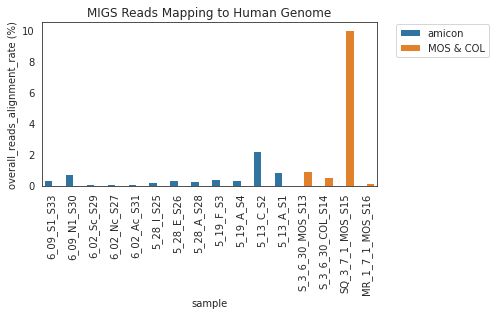

In [229]:
sns.set_style('white')
plt.figure(figsize=(6,3))
sns.barplot(x='sample',y='overall_reads_alignment_rate (%)',hue='method',data=Hdb_MIGS);
plt.xticks(rotation=90);
plt.title('MIGS Reads Mapping to Human Genome')
plt.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right')
plt.show()

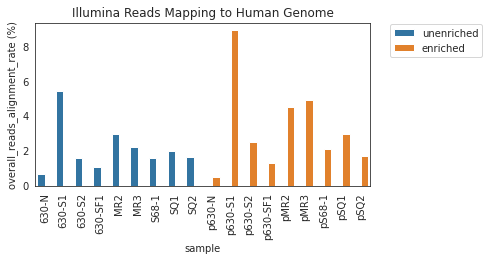

In [230]:
sns.set_style('white')
plt.figure(figsize=(6,3))
sns.barplot(x='sample',y='overall_reads_alignment_rate (%)',hue='enrichment',data=Hdb_ILLUMINA.sort_values('sample'))
plt.xticks(rotation=90);
plt.title('Illumina Reads Mapping to Human Genome')
plt.legend(bbox_to_anchor=(1.35, 1.02), loc='upper right')
plt.show()

### Combined two into one

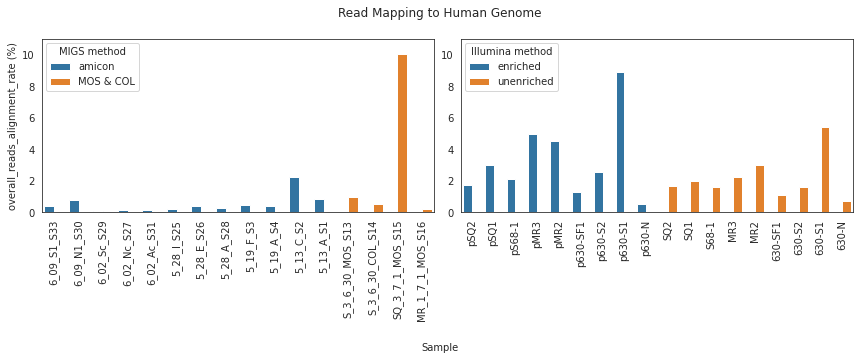

In [232]:
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,3))
fig.tight_layout()
fig.suptitle('Read Mapping to Human Genome',y=1.08)


ax1 = plt.subplot(1,2, 1)
sns.barplot(x='sample',y='overall_reads_alignment_rate (%)',hue='subgroup',data=Hdb_MIGS,ax=ax1)
ax1.set_xticklabels(Hdb_MIGS['sample'], rotation=90);
ax1.legend(title="MIGS method",bbox_to_anchor=(.26, 1.005), loc='upper right')
ax1.set_ylim([0, 11])
ax1.set_xlabel('')

ax2 = plt.subplot(1,2, 2)
sns.barplot(x='sample',y='overall_reads_alignment_rate (%)',hue='subgroup',data=Hdb_ILLUMINA,ax=ax2)
ax2.legend(title="Illumina method",bbox_to_anchor=(.26, 1.005), loc='upper right')
ax2.set_xticklabels(Hdb_ILLUMINA['sample'], rotation=90)
ax2.set_ylim([0, 11])
ax2.set_ylabel('')
ax2.set_xlabel('')


fig.text(0.5, -0.5, 'Sample', va='center', ha='center');
plt.savefig('/data/viral_genome_analysis/outputs/Wastewater_reads_mapping_to_human_genome.svg',format='svg',\
           transparent=True, bbox_inches='tight')